# HEART DISEASE CLASSIFICATION


**We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use Machine Learning Algorithms.**

Data contains;

- age - age in years

- sex - (1 = male; 0 = female)

- cp - chest pain type

- trestbps - resting blood pressure (in mm Hg on admission to the hospital)

- chol - serum cholestoral in mg/dl

- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg - resting electrocardiographic results

- thalach - maximum heart rate achieved

- exang - exercise induced angina (1 = yes; 0 = no)

- oldpeak - ST depression induced by exercise relative to rest

- slope - the slope of the peak exercise ST segment

- ca - number of major vessels (0-3) colored by flourosopy

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

- target - have disease or not (1=yes, 0=no)

### Importing Datasets and Libraries

In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### READ DATA

In [39]:
df = pd.read_csv('heart.csv')

In [40]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### Data Exploration

In [41]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

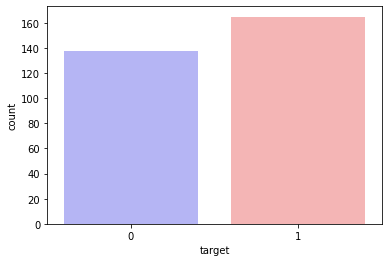

In [42]:
sns.countplot(x='target', data=df, palette='bwr')
plt.show()

In [43]:
countNoDisease = len(df[df.target==0])
countHaveDisease = len(df[df.target==1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Hav Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Hav Heart Disease: 54.46%


In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


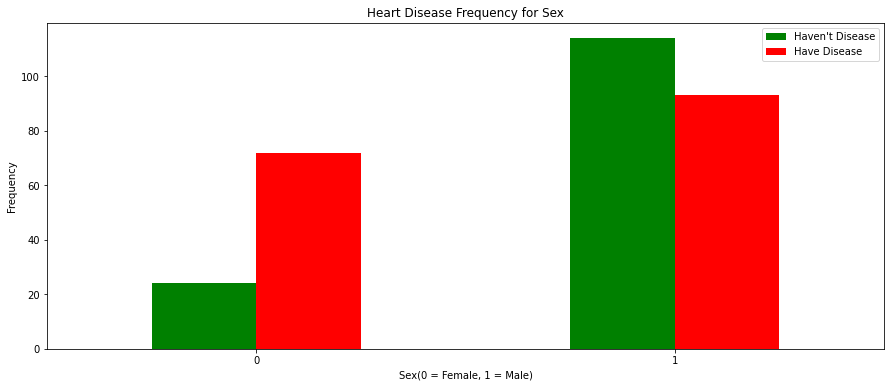

In [47]:
# MALE vs FEMALE
pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(15,6),color=['green', 'red'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex(0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

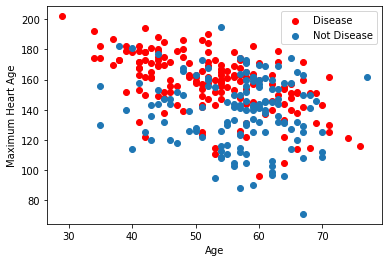

In [48]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c='red')
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(['Disease', 'Not Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Age')
plt.show()

**Creating Dummy Variable**

Since 'cp', 'thal'and 'slope' are categorical variables we'll turn them into dummy variables.

In [49]:
a = pd.get_dummies(df['cp'], prefix='cp')
b = pd.get_dummies(df['thal'], prefix='thal')
c = pd.get_dummies(df['slope'], prefix='slope')

In [50]:
frames = [df,a,b,c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0,0,0,1,0,0,0,1


In [51]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


# Splitting the Data

In [52]:
X = df.drop(['target'], axis=1)
y = df['target']

In [53]:
X.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'thal_0', 'thal_1',
       'thal_2', 'thal_3', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [54]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


# Machine Learning Model

**Let's play with differet Machine Learning Algorithms,  from data we can say that this is a classification problem**

1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
acc_lr = round(lr.score(X_train, y_train)*100, 2)
print(str(acc_lr)+ ' Percentage')

86.36 Percentage


2. Support Vector Classifier

In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
print(str(acc_svc)+' Percentage')

66.53 Percentage


3. K-Nearest Classifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train)*100, 2)
print(str(acc_knn)+' Percentage')

78.1 Percentage


4. Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
acc_dt = round(dt.score(X_train, y_train)*100, 2)
print(str(acc_dt)+' Percentage')

100.0 Percentage


5. Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
acc_rf = round(rf.score(X_train, y_train)*100, 2)
print(str(acc_rf)+' Percentage')

100.0 Percentage


6. Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
acc_nb = round(nb.score(X_train, y_train)*100, 2)
print(str(acc_nb)+' Percentage')

84.71 Percentage


# Comparing Modela
Let's compare the accuracy score of all the models used above

In [63]:
models = pd.DataFrame({
    'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score':[acc_lr, acc_svc, acc_knn, acc_dt, acc_rf, acc_nb]
})

models.sort_values(by='Score', ascending=False)

,Models,Score
3,Decision Tree,100.00
4,Random Forest,100.00
0,Logistic Regression,86.36
5,Naive Bayes,84.71
2,KNN,78.10
1,Support Vector,66.53


From above table we can see that Decision Tree and RandomForest have 100% accuracy, but above scores are based on Train datasets.

So, our task is now to check accuracy_score on TEST data.

So let's check

In [64]:
from sklearn.metrics import accuracy_score

Applying predict method to all algorithms

In [65]:
lr_pred = lr.predict(X_test) #Logistic Regression
svm_pred = svc.predict(X_test) #Support Vector
knn_pred = knn.predict(X_test) #K-Nearest
dt_pred = dt.predict(X_test) #Decision Tree
rf_pred = rf.predict(X_test) #Random Forest
nb_pred = rf.predict(X_test) #Naive Bayes

Time to check accuracy_score on test

In [66]:
test_lr = round(accuracy_score(lr_pred, y_test)*100,2)
test_svm = round(accuracy_score(svm_pred, y_test)*100,2)
test_knn = round(accuracy_score(knn_pred, y_test)*100,2)
test_dt = round(accuracy_score(dt_pred, y_test)*100,2)
test_rf = round(accuracy_score(rf_pred, y_test)*100,2)
test_nb = round(accuracy_score(nb_pred, y_test)*100,2)

test_models = pd.DataFrame({
    'Models':['Logistic Regression', 'Support Vector', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Score(Test Data)':[test_lr, test_svm, test_knn, test_dt, test_rf, test_nb]
})

test_models.sort_values(by='Score(Test Data)', ascending=False)

,Models,Score(Test Data)
4,Random Forest,86.89
5,Naive Bayes,86.89
0,Logistic Regression,85.25
3,Decision Tree,75.41
1,Support Vector,68.85
2,KNN,63.93


From Above two tables, we can see that **Random Forest** has better score on both test and train scores. 
So will evaluate our model on **Random Forest**.

# Model Evaluations

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

**Classification Report**

In [68]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



**Confusion Matrix**

In [69]:
cm = confusion_matrix(y_test, rf_pred)

In [70]:
cm

array([[23,  4],
       [ 4, 30]])

# Visualize

Text(0.5, 1.0, 'Confusion Matrix')

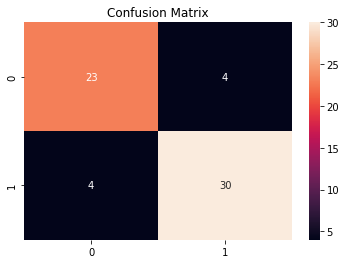

In [71]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')

# Building Predictive Model

In [72]:
input_data = (34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


**DATA FOR PERSON DOES NOT HAVE A HEART DISEASE**


34, 1, 140,230,0,1,170,1, 3.2, 1, 1,0,0,0,0,1,0,0,0,0,1

**DATA FOR PERSON HAS A HEART DISEASE**

54, 0,132,200,1,0,220,0,4.2,0,0,1,1,1,1,0,1,1,1,1,0

# GREAT JOB !

**We are done with this Project**